# 1. Importación de los datos

In [1]:
!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Añadimos los nombres a las columnas manualmente, ya que el dataset no los incluye
feature_names = ['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-doors', 'body-style', 'drive-wheels',
        'engine-location', 'wheel-base', 'length', 'width', 'height', 'weight',
        'engine-type', 'num-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price']

df = pd.read_csv('datasets/imports-85.data', names=feature_names, na_values='?')
print(len(df))
df.head(5)

205


,symboling,normalized-losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-doors             object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
weight                 int64
engine-type           object
num-cylinders         object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# 2. Preparación de los datos

In [5]:
def print_cols_with_missing_values(df):
    cols_with_missing = df.isnull().sum()
    print(cols_with_missing[cols_with_missing > 0])

print_cols_with_missing_values(df)

normalized-losses    41
num-doors             2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [6]:
df['normalized-losses'].replace(np.nan, df['normalized-losses'].mean(), inplace=True)
df['bore'].replace(np.nan, df['bore'].mean(), inplace=True)
df['stroke'].replace(np.nan, df['stroke'].mean(), inplace=True)
df['horsepower'].replace(np.nan, df['horsepower'].mean(), inplace=True)
df['peak-rpm'].replace(np.nan, df['peak-rpm'].mean(), inplace=True)

In [7]:
num_doors_mode = df['num-doors'].value_counts().idxmax()
print(num_doors_mode)
df['num-doors'].replace(np.nan, num_doors_mode, inplace=True)

four


In [8]:
df.dropna(subset=['price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
print_cols_with_missing_values(df)

Series([], dtype: int64)


# 3. Normalización de los datos

In [10]:
numeric_feature_names = ['symboling', 'wheel-base', 'normalized-losses',
        'length', 'width', 'height', 'weight', 'engine-size', 
        'bore', 'stroke', 'compression-ratio', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg']
print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
categorical_feature_names = ['make', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location',
        'engine-type', 'num-cylinders', 'fuel-system']
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')

all_feature_names = numeric_feature_names + categorical_feature_names
target = 'price'

Propiedades numéricas: ['symboling', 'wheel-base', 'normalized-losses', 'length', 'width', 'height', 'weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'] (15)
Propiedades categóricas: ['make', 'fuel-type', 'aspiration', 'num-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-cylinders', 'fuel-system'] (10)


/tmp/ipykernel_12062/2575192092.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax=plt.figure(figsize=(15,15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>, <AxesSubplot:>]],
      dtype=object)

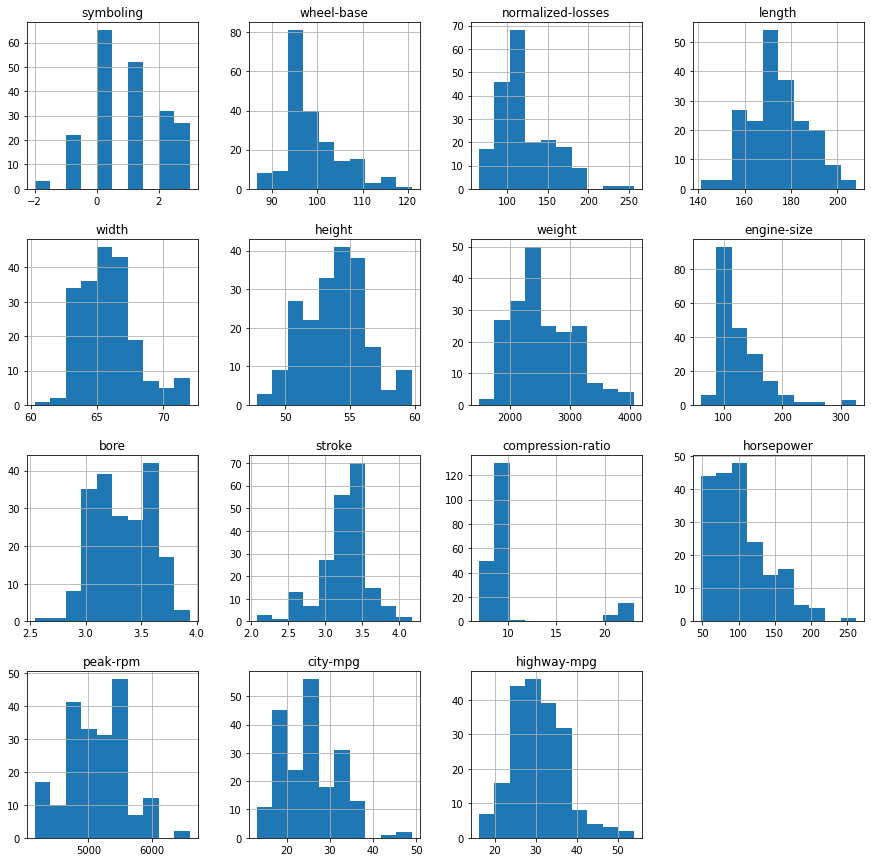

In [11]:
import matplotlib.pyplot as plt
df[numeric_feature_names].hist(ax=plt.figure(figsize=(15,15)).gca())

In [12]:
import seaborn as sns

def draw_hist_boxplot(df, feature_name):
    sns.boxplot(x=feature_name, data=df)
    sns.stripplot(x=feature_name, data=df, color="#474646")

def replace_outliers_with_median(df, feature_name):
    Q1 = df[feature_name].quantile(0.25)
    median = df[feature_name].quantile(0.5)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                 median, 
                                 df[feature_name])

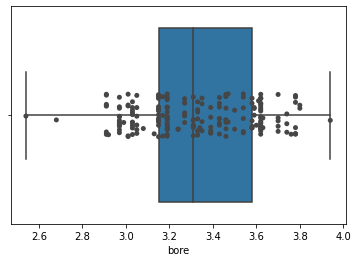

In [13]:
draw_hist_boxplot(df, 'bore')

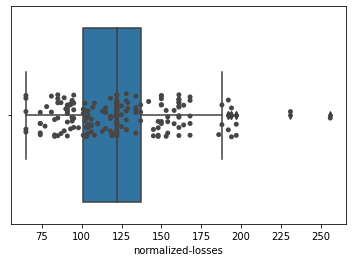

In [14]:
draw_hist_boxplot(df, 'normalized-losses')

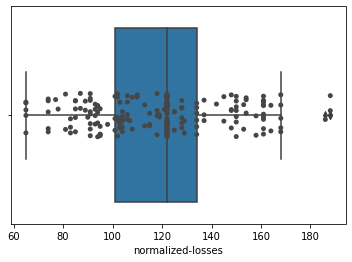

In [15]:
replace_outliers_with_median(df, 'normalized-losses')
draw_hist_boxplot(df, 'normalized-losses')

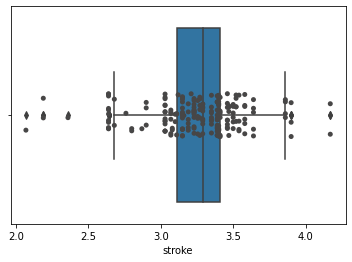

In [16]:
draw_hist_boxplot(df[numeric_feature_names], 'stroke')

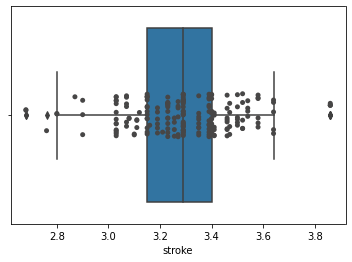

In [17]:
replace_outliers_with_median(df, 'stroke')
draw_hist_boxplot(df, 'stroke')

2.5844624326120726


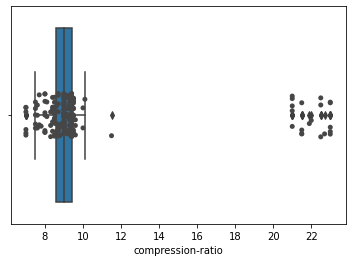

In [18]:
draw_hist_boxplot(df, 'compression-ratio')
print(df['compression-ratio'].skew())

-0.9620357876829908


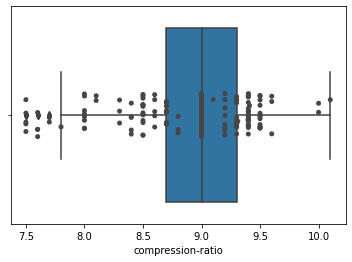

In [19]:
replace_outliers_with_median(df, 'compression-ratio')
print(df['compression-ratio'].skew())
draw_hist_boxplot(df, 'compression-ratio')

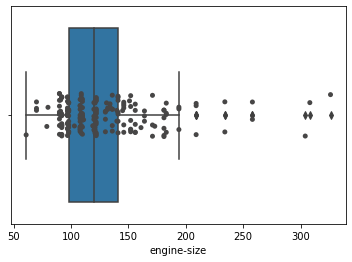

In [20]:
draw_hist_boxplot(df, 'engine-size')

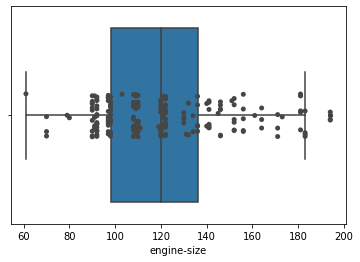

In [21]:
replace_outliers_with_median(df, 'engine-size')
draw_hist_boxplot(df, 'engine-size')

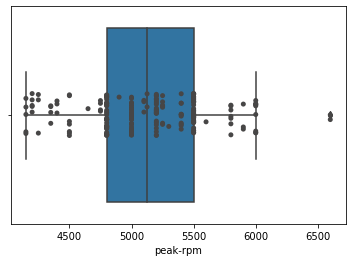

In [22]:
draw_hist_boxplot(df, 'peak-rpm')

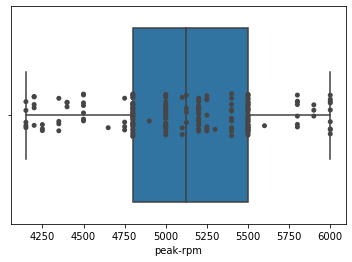

In [23]:
replace_outliers_with_median(df, 'peak-rpm')
draw_hist_boxplot(df, 'peak-rpm')

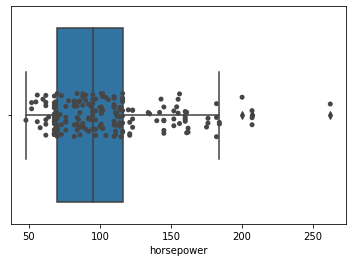

In [24]:
draw_hist_boxplot(df, 'horsepower')

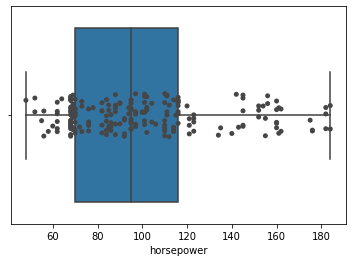

In [25]:
replace_outliers_with_median(df, 'horsepower')
draw_hist_boxplot(df, 'horsepower')

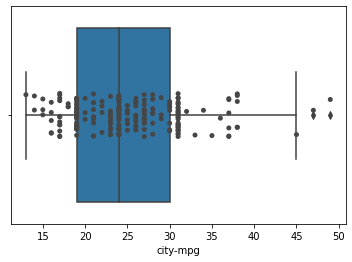

In [26]:
draw_hist_boxplot(df, 'city-mpg')

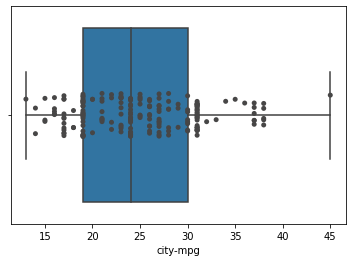

In [27]:
df.drop(df.loc[df['city-mpg'] > 45].index, inplace=True)
draw_hist_boxplot(df, 'city-mpg')

/tmp/ipykernel_12062/3557069305.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax=plt.figure(figsize=(15,15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>, <AxesSubplot:>]],
      dtype=object)

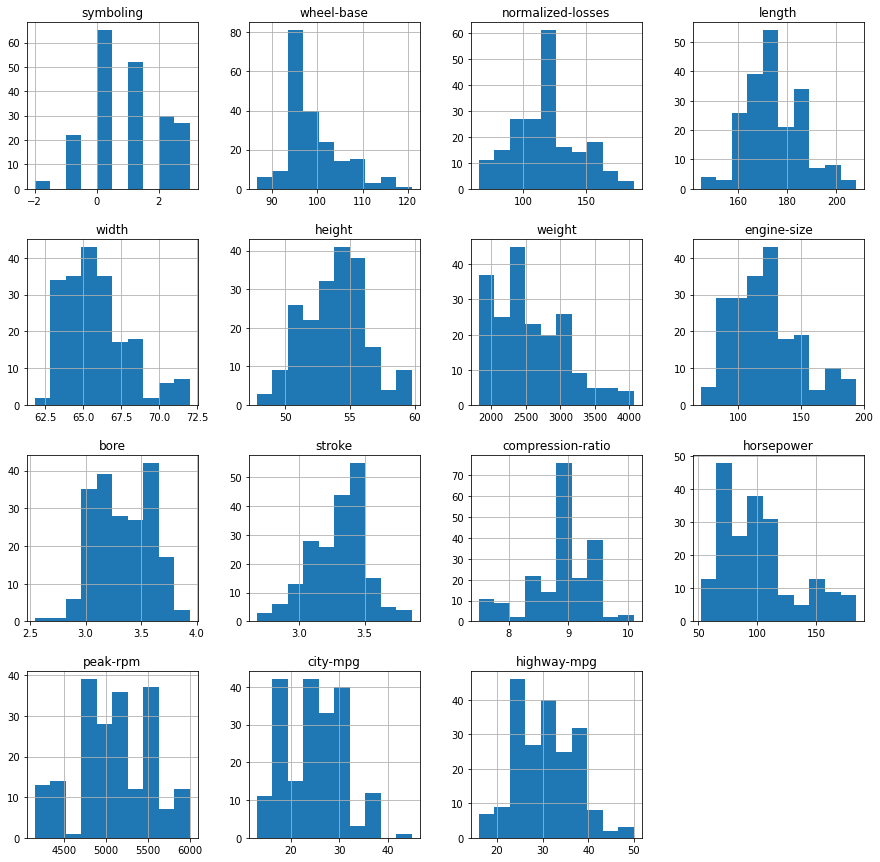

In [28]:
df[numeric_feature_names].hist(ax=plt.figure(figsize=(15,15)).gca())

/tmp/ipykernel_12062/360014565.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax=plt.figure(figsize=(15,15)).gca())


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>, <AxesSubplot:>]],
      dtype=object)

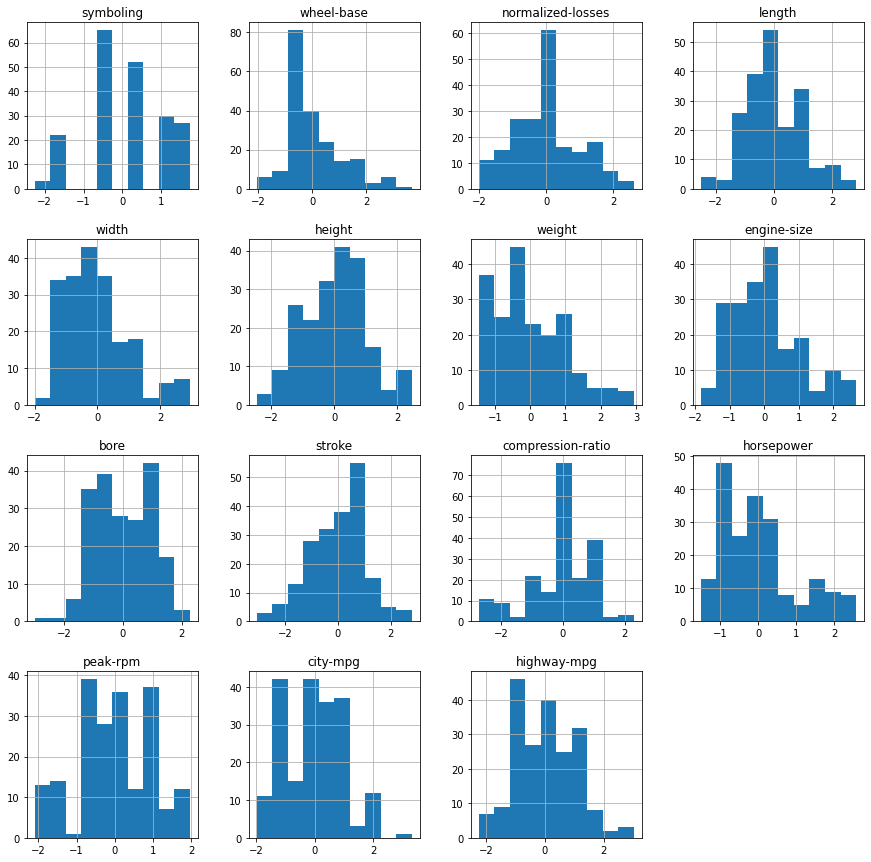

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_feature_names] = scaler.fit_transform(df[numeric_feature_names])
df[numeric_feature_names].hist(ax=plt.figure(figsize=(15,15)).gca())

# 4. Importancia de propiedades y división del conjunto de datos

<AxesSubplot:>

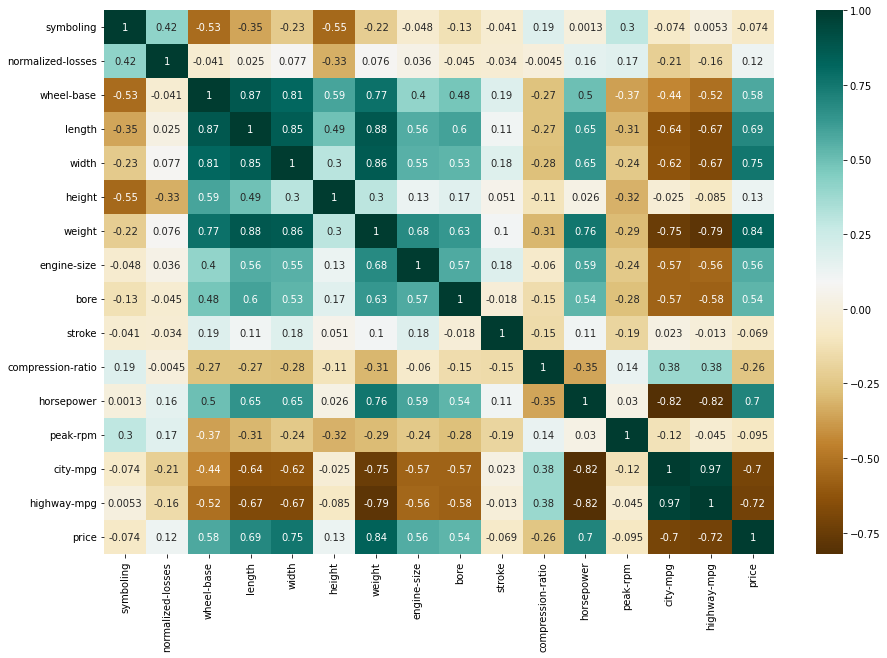

In [30]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='BrBG', annot=True)

In [31]:
df.drop(['symboling'], axis=1, inplace=True)

<AxesSubplot:xlabel='body-style', ylabel='price'>

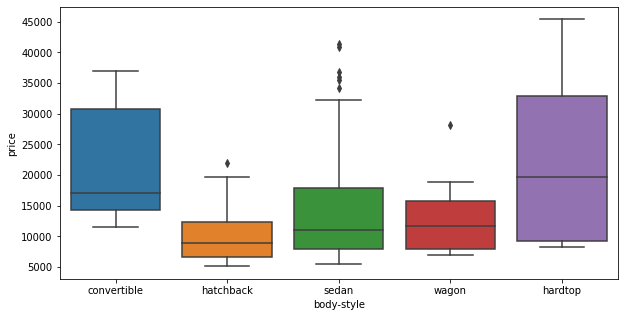

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='body-style', y='price', data=df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

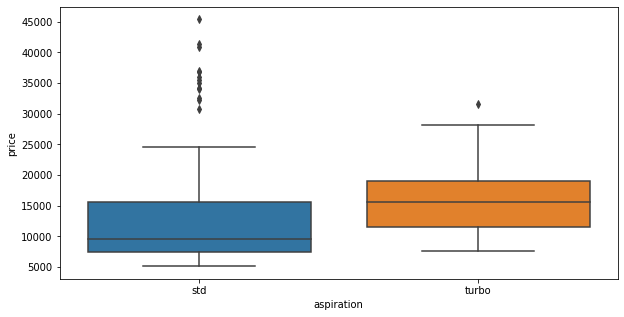

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='aspiration', y='price', data=df)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

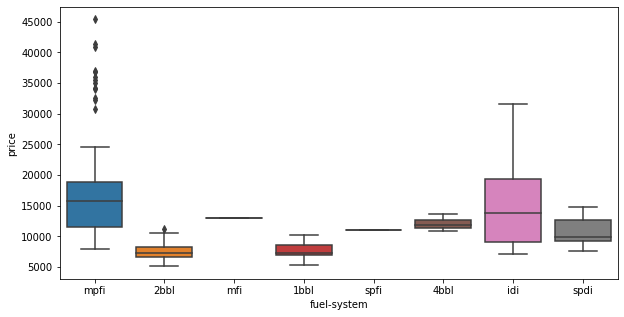

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='fuel-system', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

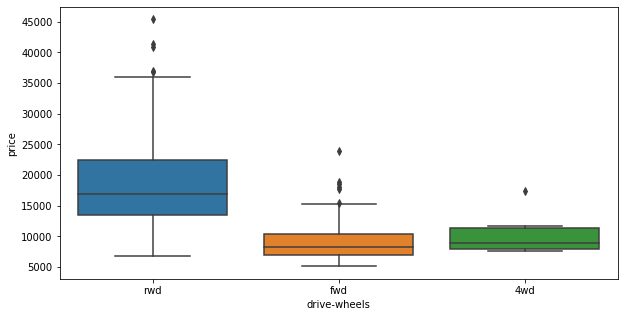

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='drive-wheels', y='price', data=df)

In [36]:
numeric_feature_names = ['normalized-losses', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-size', 
        'bore', 'stroke', 'compression-ratio', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg']
print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
categorical_feature_names = ['make', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location',
        'engine-type', 'num-cylinders', 'fuel-system']
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')

all_feature_names = numeric_feature_names + categorical_feature_names

Propiedades numéricas: ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'] (14)
Propiedades categóricas: ['make', 'fuel-type', 'aspiration', 'num-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-cylinders', 'fuel-system'] (10)


In [37]:
df[numeric_feature_names].head()

,normalized-losses,wheel-base,length,width,height,weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.130509,-1.726065,-0.478688,-0.885243,-2.039000,-0.033891,0.341233,0.509006,-3.073377,0.171938,0.314884,-0.229763,-0.656758,-0.537362
1,0.130509,-1.726065,-0.478688,-0.885243,-2.039000,-0.033891,0.341233,0.509006,-3.073377,0.171938,0.314884,-0.229763,-0.656758,-0.537362
2,0.130509,-0.738360,-0.277702,-0.206946,-0.566332,0.505893,1.140119,-2.467847,0.861783,0.171938,1.649773,-0.229763,-0.989315,-0.692791
3,1.709080,0.148900,0.174516,0.132202,0.210910,-0.448053,-0.421340,-0.546081,0.513098,2.107213,0.035488,0.869265,-0.157923,-0.071076
4,1.709080,0.081937,0.174516,0.229102,0.210910,0.507856,0.559111,-0.546081,0.513098,-1.763337,0.439059,0.869265,-1.155593,-1.314507


In [38]:
df[categorical_feature_names].head()

,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,engine-type,num-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [39]:
from sklearn.model_selection import train_test_split

X_train_full, X_test = train_test_split(df[all_feature_names + [target]], test_size=0.2, random_state=1)
X_train, X_val = train_test_split(X_train_full, test_size=0.33, random_state=1)

y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

X_train.drop([target], axis=1, inplace=True)
X_val.drop([target], axis=1, inplace=True)
X_test.drop([target], axis=1, inplace=True)

X_train.head()

,normalized-losses,wheel-base,length,width,height,weight,engine-size,bore,stroke,compression-ratio,...,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,engine-type,num-cylinders,fuel-system
142,-1.109797,-0.319841,-0.085091,-0.255396,-0.320887,-0.540307,-0.457653,1.074231,-0.034836,0.171938,...,subaru,gas,std,four,wagon,fwd,front,ohcf,four,2bbl
35,-1.523232,-0.403545,-1.458495,-0.982143,1.847208,-1.062426,-1.038662,-1.563487,0.562910,0.558993,...,honda,gas,std,four,wagon,fwd,front,ohc,four,1bbl
64,-0.959457,1.856457,1.372057,2.118643,1.110874,1.864188,2.265823,0.923504,1.708590,0.171938,...,mercedes-benz,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
175,0.130509,0.667864,0.752351,0.858949,-0.729962,0.884724,1.830066,-0.244628,0.264037,0.752520,...,toyota,gas,std,two,hatchback,rwd,front,dohc,six,mpfi
47,-0.546022,-0.972731,-1.291006,-0.836793,0.129095,-1.325449,-1.074975,-1.148988,-0.732206,0.171938,...,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl


# 5. Ingeniería de propiedades

In [40]:
train_dict = X_train[all_feature_names].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'aspiration': 'std',
 'body-style': 'wagon',
 'bore': 1.0742307028323315,
 'city-mpg': 0.5071908288201766,
 'compression-ratio': 0.17193796378334733,
 'drive-wheels': 'fwd',
 'engine-location': 'front',
 'engine-size': -0.4576534592550545,
 'engine-type': 'ohcf',
 'fuel-system': '2bbl',
 'fuel-type': 'gas',
 'height': -0.3208870972487771,
 'highway-mpg': 0.23978229024840692,
 'horsepower': -0.585390866785266,
 'length': -0.08509077518155339,
 'make': 'subaru',
 'normalized-losses': -1.109796953676926,
 'num-cylinders': 'four',
 'num-doors': 'four',
 'peak-rpm': -0.6693738433780904,
 'stroke': -0.03483575396661588,
 'weight': -0.5403074140306409,
 'wheel-base': -0.3198410045400321,
 'width': -0.25539604207180566}

In [41]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_train[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.0742307 ,  0.50719083,  0.17193796,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
       -0.45765346,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
       -0.3208871 ,  0.23978229, -0.58539087, -0.08509078,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
       -1.10979695,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        , -0.66937384, -0.03483575,
       -0.54030741, -0.319841  , -0.25539604])

In [42]:
dv.get_feature_names_out()

array(['aspiration=std', 'aspiration=turbo', 'body-style=convertible',
       'body-style=hardtop', 'body-style=hatchback', 'body-style=sedan',
       'body-style=wagon', 'bore', 'city-mpg', 'compression-ratio',
       'drive-wheels=4wd', 'drive-wheels=fwd', 'drive-wheels=rwd',
       'engine-location=front', 'engine-location=rear', 'engine-size',
       'engine-type=dohc', 'engine-type=l', 'engine-type=ohc',
       'engine-type=ohcf', 'engine-type=ohcv', 'engine-type=rotor',
       'fuel-system=1bbl', 'fuel-system=2bbl', 'fuel-system=4bbl',
       'fuel-system=idi', 'fuel-system=mpfi', 'fuel-system=spdi',
       'fuel-type=diesel', 'fuel-type=gas', 'height', 'highway-mpg',
       'horsepower', 'length', 'make=alfa-romero', 'make=audi',
       'make=bmw', 'make=chevrolet', 'make=dodge', 'make=honda',
       'make=jaguar', 'make=mazda', 'make=mercedes-benz', 'make=mercury',
       'make=mitsubishi', 'make=nissan', 'make=peugot', 'make=plymouth',
       'make=porsche', 'make=renault', 'm

# 6. Entrenamiento del modelo

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.score(X_train, y_train)

0.9837154885225918

In [45]:
X_val = dv.transform(X_val[all_feature_names].to_dict(orient='records'))
model.score(X_val, y_val)

0.7462595560881797

In [46]:
X_test = dv.transform(X_test[all_feature_names].to_dict(orient='records'))
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9177613476451484

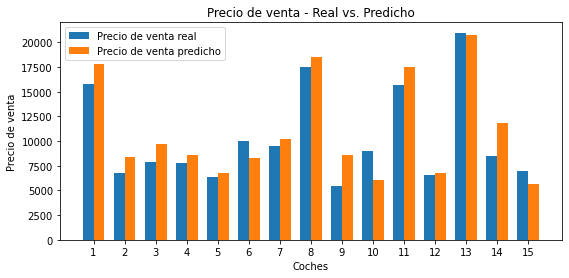

In [47]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(15)
width = 0.35

plt.figure(figsize=(9,4))
plt.bar(ind, y_test[:15], width, label='Precio de venta real')
plt.bar(ind+width, y_pred[:15], width, label='Precio de venta predicho')

plt.xticks(ind+width/2, np.arange(1, 16))
plt.legend(loc='best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Predicho')

plt.show()